<a href="https://colab.research.google.com/github/dauphin95/data_spring/blob/master/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_09_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install -U pandas-profiling

In [43]:
import pandas as pd

In [44]:
import pandas_profiling

In [45]:
df = pd.read_csv('credit_cards_dataset.csv')

In [46]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [47]:
# df.profile_report()

In [48]:
# df.corr(method='spearman')

In [57]:
## 랜덤포레스트 알고리즘
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Y = df['default.payment.next.month'].values
X = df.drop(['ID','default.payment.next.month'], axis =1).values

test_size = 0.3
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

result = model.score(X_test, Y_test)
print(f"Accuracy: {result*100}")

Accuracy: 72.81111111111112


In [58]:
## 리콜값 검증 (recall) -> 거의 맞지 않음, 새로운 알고리즘 가져오기
from sklearn.metrics import recall_score

y_predict = model.predict(X_test)

print("Recall score:"+ str(recall_score(Y_test, y_predict)))

Recall score:0.41836734693877553


Confusion matrix, without normalization
[[5737 1303]
 [1141  819]]


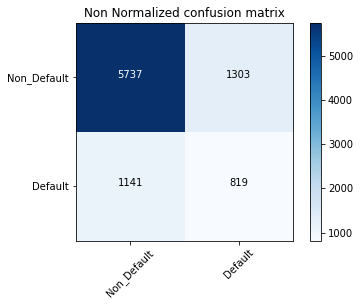

In [54]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
cnf_matrix = confusion_matrix(Y_test, y_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')

In [59]:
import sklearn.metrics as metrics

print('accuracy', metrics.accuracy_score(Y_test, y_predict) )

print('precision', metrics.precision_score(Y_test, y_predict) )

print('recall', metrics.recall_score(Y_test, y_predict) )

print('f1', metrics.f1_score(Y_test, y_predict) )

print(metrics.classification_report(Y_test, y_predict))

print(metrics.confusion_matrix(Y_test, y_predict))

accuracy 0.7281111111111112
precision 0.385519511048425
recall 0.41836734693877553
f1 0.40127232689013953
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7040
           1       0.39      0.42      0.40      1960

    accuracy                           0.73      9000
   macro avg       0.61      0.62      0.61      9000
weighted avg       0.74      0.73      0.73      9000

[[5733 1307]
 [1140  820]]
